In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
df = pd.read_csv('../data/processed/all_bank_reviews_with_themes.csv')

theme_cnt = df.groupby(['bank', 'themes']).size().reset_index(name='count')

drivers = df[df['sentiment'] == 'POSITIVE'].groupby('bank')['themes'].value_counts()
pain_points = df[df['sentiment'] == 'NEGATIVE'].groupby('bank')['themes'].value_counts()


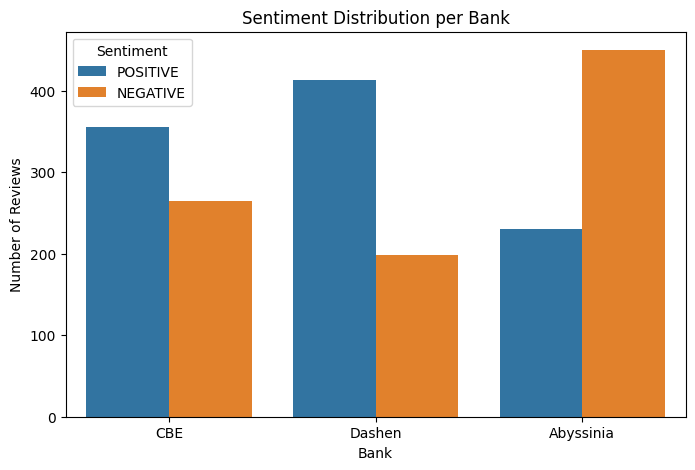

In [12]:
plt.figure(figsize=(8,5))
sns.countplot(x='bank', hue='sentiment', data=df)
plt.title('Sentiment Distribution per Bank')
plt.xlabel('Bank')
plt.ylabel('Number of Reviews')
plt.legend(title='Sentiment')
plt.show()

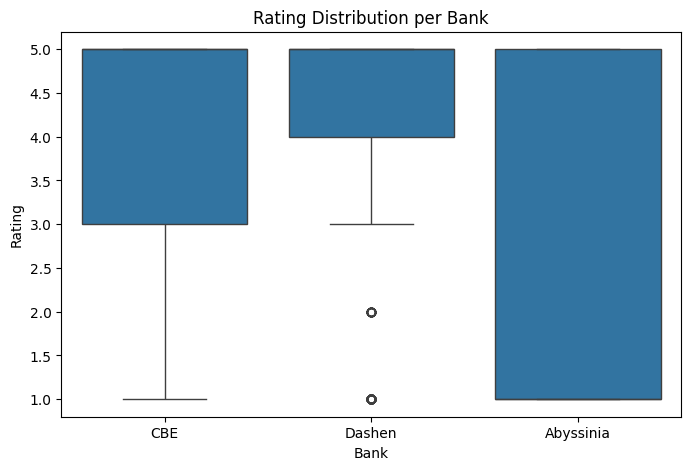

In [18]:
plt.figure(figsize=(8,5))
sns.boxplot(x='bank', y='rating', data=df)
plt.title('Rating Distribution per Bank')
plt.xlabel('Bank')
plt.ylabel('Rating')
plt.show()


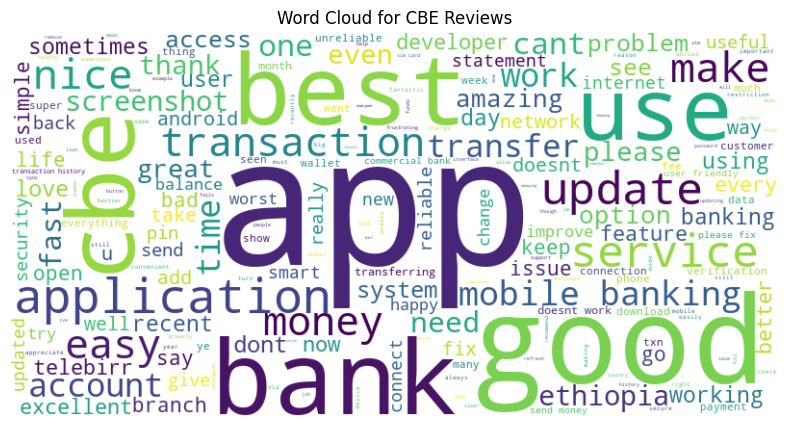

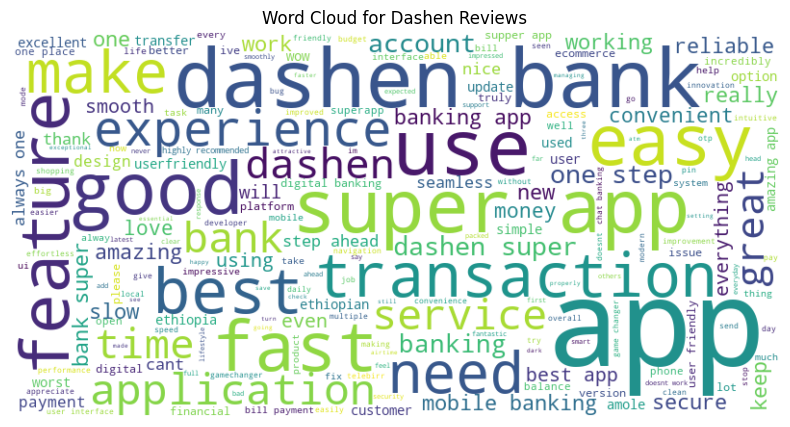

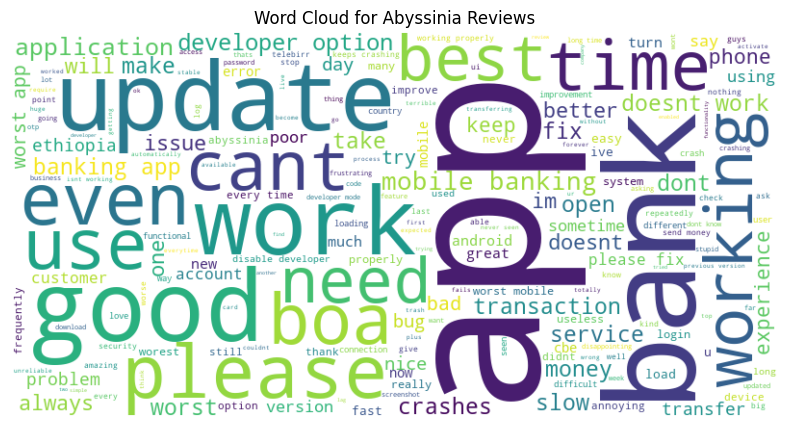

In [19]:
for bank in df['bank'].unique():
    text = ' '.join(df[df['bank'] == bank]['clean_review'].astype(str))
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {bank} Reviews')
    plt.show()